In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from kmeans_distributed import *

In [8]:
def dictify_xy_data(X, Y, labels):
    dictified = []
    for x, y, label in zip(X, Y, labels):
        dictified += {'x': float(x), 'y': float(y), 'cluster_id': label}
    return dictified

In [54]:
def generate_noisy_target(cx, cy, N=50, std=0.3):
    noise_x = std * np.random.randn(N)
    noise_y = std * np.random.randn(N)
    
    X = np.array([cx + noise for noise in noise_x])
    Y = np.array([cy + noise for noise in noise_y])
    return X, Y

In [59]:
def generate_synthetic_dataset(centers):
    X = np.zeros([0])
    Y = np.zeros([0])
    labels = np.zeros([0])
    
    for i, center in enumerate(centers):
        X_i, Y_i = generate_noisy_target(*center)
        labels_i = i * np.ones_like(X_i)
        
        X = np.concatenate([X, X_i])
        Y = np.concatenate([Y, Y_i])
        labels = np.concatenate([labels, labels_i])
    return X, Y, labels

In [60]:
def plot_clustering(x, y, labels):
    colors = ['r' if lbl == 0 else 'b' for lbl in labels]
    
    f, ax = plt.subplots()
    ax.scatter(x, y, color=colors)
    
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    f.suptitle('Synthetic data')
    
    plt.show()

In [64]:
def main():
    centers = [(2.6, 5.1), (1.5, 4.7)]
    X, Y, labels = generate_synthetic_dataset(centers)
    plot_clustering(X, Y, labels)
   
    if False:
        kmeans_distributed(X, Y, k=2, epochs=2)
        df = get_spark_clustering()   

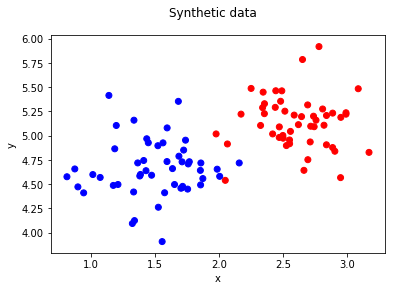

In [65]:
main()